In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
%matplotlib inline

In [2]:
# Read in data
df = pd.read_excel("fn_data-1.xlsx")

In [3]:
#Do stuff to data


# Create new date variable to MM-YYYY
df["Month"]=df["Month"].str.strip()
df["Date"] = pd.to_datetime(df["Month"] + df["Year"].astype(str), format="%b%Y").dt.strftime('%m-%Y') 

#Remove deaths per million columns
df2=df.drop(["AMR_Zymotic_diseases","AMR_Wounds_injuries", "AMR_Other", "Month", "Year"],axis=1)

#Reshape dataframe
df3 = df2.melt(id_vars=["Date","Average_Army_Size"], 
               value_vars = ["Deaths_Zymotic_Diseases","Deaths_Wounds_Injuries","Deaths_Other"],
              var_name="cod", value_name="N")

#New variable for marker size
df3["ms"] = 10*df3["N"]

#dataframe for each cause of death
df3_wound = df3[df3["cod"]=="Deaths_Wounds_Injuries"]
df3_other = df3[df3["cod"]=="Deaths_Other"]

In [4]:
#List of causes of death in string format
x_labels = ["Zymotic Diseases", "Wounds and Injuries", "Other Causes"]

#import font
prop = fm.FontProperties(fname="SaucyJack.ttf")
tick_prop = fm.FontProperties(fname="SaucyJack.ttf", size=25)

#Create colour map
cmap = plt.cm.coolwarm
norm = matplotlib.colors.Normalize(vmin=0, vmax=2000)



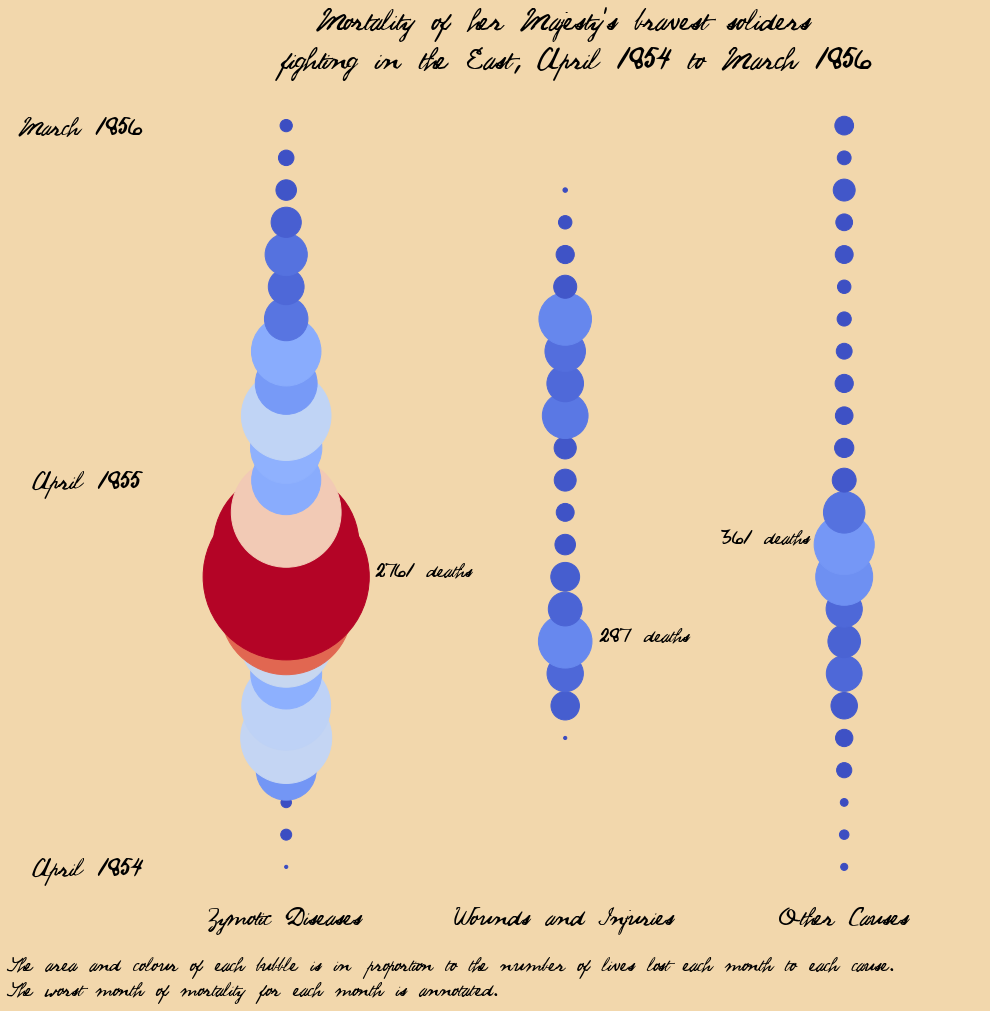

In [5]:
#Background colour
fig, ax = plt.subplots(1,1,figsize=[15,15],facecolor="#f2d7ac")
ax.set_facecolor("#f2d7ac")


bubbles = ax.scatter(x=df3["cod"],  y=df3["Date"], s=df3["ms"],    c=cmap(norm(df3["N"].values)))

ax.set_xlim([-0.5,2.5])

ax.set_xticks([0,1,2])
ax.set_xticklabels(x_labels,fontproperties=tick_prop)

for label in ax.get_xticklabels() :
    label.set_fontproperties(tick_prop)

ax.set_yticks(["04-1854","04-1855","03-1856"])
ax.set_yticklabels(["April 1854","April 1855","March 1856"],fontsize=25,fontproperties=prop)

for label in ax.get_yticklabels() :
    label.set_fontproperties(tick_prop)

ax.text(-1,-4,"The area and colour of each bubble is in proportion to the number of lives lost each month to each cause.\nThe worst month of mortality for each month is annotated.",
        fontproperties=prop,fontsize=20)

ax.text(0.32 ,df3[df3["N"]==df3["N"].max()]["Date"],str(df3["N"].max())+" deaths",
        fontproperties=prop,fontsize=20)

ax.text(1.12 ,df3_wound[df3_wound["N"]==df3_wound["N"].max()]["Date"]
        ,str(df3_wound["N"].max())+" deaths",
        fontproperties=prop,fontsize=20)

ax.text(1.56 ,df3_other[df3_other["N"]==df3_other["N"].max()]["Date"]
        ,str(df3_other["N"].max())+" deaths",
        fontproperties=prop,fontsize=20)

plt.title("Mortality of her Majesty's bravest soliders\n fighting in the East, April 1854 to March 1856",
          fontproperties=prop,fontsize=30,pad=20 )

sns.despine(left=True, bottom=True, right=True)
ax.tick_params(length=0)